In [33]:
# Handle all includes
%load_ext autoreload
%autoreload 2

import os
import shutil
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from spatz.utils.preprocess import preprocess_file
from spatz.simulation import Simulation, UniformTimeSteps


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Do preprocessing
PATH = "data/simulations"
TMP = f"{PATH}/temp"
FILE = "13.5"

if os.path.isdir(TMP):
    shutil.rmtree(TMP)
os.mkdir(TMP)

df = preprocess_file(f"{PATH}/{FILE}.txt")
df.to_csv(f"{TMP}/{FILE}.csv")


    Time             R      LONG      DECL  PROP_TANK@STAHR  Norm_Indep_Var  \
1 -0.100  6.360124e+06  0.367914  1.182477        41.963251            0.00   
2 -0.099  6.360124e+06  0.367914  1.182477        41.961249            0.01   
3 -0.099  6.360124e+06  0.367914  1.182477        41.961249            0.01   
4 -0.098  6.360124e+06  0.367914  1.182477        41.959248            0.02   
5 -0.098  6.360124e+06  0.367914  1.182477        41.959248            0.02   

   mission_time  flight_time   julian_date      radius  ...  inertia_xy  \
1        -0.100        0.000  2.460599e+06  6360.12389  ...         0.0   
2        -0.099        0.001  2.460599e+06  6360.12389  ...         0.0   
3        -0.099        0.001  2.460599e+06  6360.12389  ...         0.0   
4        -0.098        0.002  2.460599e+06  6360.12389  ...         0.0   
5        -0.098        0.002  2.460599e+06  6360.12389  ...         0.0   

   inertia_xz  inertia_yz  aero_coef_CD@Drogue_Chute  \
1         0.0     

In [35]:
# Create simulation objects
timesteps = UniformTimeSteps(0.1, mu=0, sigma=0, delay_only=True)
simulation = Simulation(timesteps)

In [36]:
from spatz.sensors.antenna.pathloss import AntennaPathloss

alt = simulation.add_observer(['altitude'])
fspl = simulation.add_sensor(AntennaPathloss,frequency=2.45e9,rx_antenna_offset=np.array([-1500,-1500,0]))

simulation.load(f"{TMP}/{FILE}.csv")
logger = simulation.get_logger()

In [37]:
# Run simulation
for step, t, dt in simulation.run(verbose=True):
    gain = fspl()
    alt()

df = logger.get_dataframe()

100%|█████████▉| 521.40000000005/521.469806781021 [00:17<00:00, 29.06it/s]  


In [38]:
df

time antenna/pathloss/distance antenna/pathloss/out general/altitude
0       0.1               2121.343699           106.763326       319.189854
1       0.2                2121.41328           106.763611       319.754649
2       0.3               2121.528819           106.764084       320.689767
3       0.4               2121.690116           106.764744        321.98961
4       0.5               2121.897233           106.765592       323.649225
...     ...                       ...                  ...              ...
5209  521.0              10823.478921           120.918442       321.436986
5210  521.1              10823.478982           120.918442       320.918266
5211  521.2              10823.479069           120.918443       320.399547
5212  521.3               10823.47918           120.918443       319.880828
5213  521.4              10823.479316           120.918443       319.362108

[5214 rows x 4 columns]

124.65577958452681


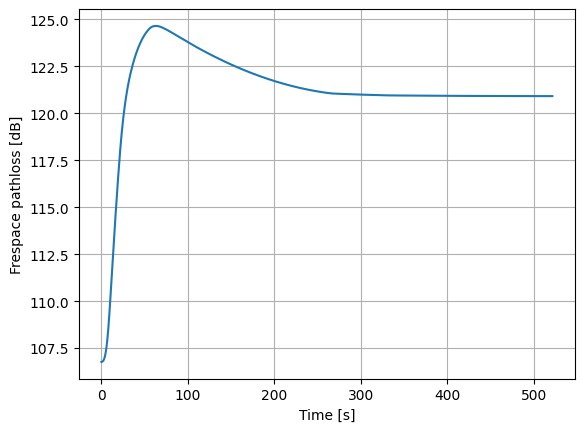

In [41]:
plt.grid()
plt.plot(df['time'][1:], df['antenna/pathloss/out'][1:], label='FSPL')
plt.ylabel("Frespace pathloss [dB]")
plt.xlabel("Time [s]")

print(np.max(df['antenna/pathloss/out'][1:]))

16643.081265141995


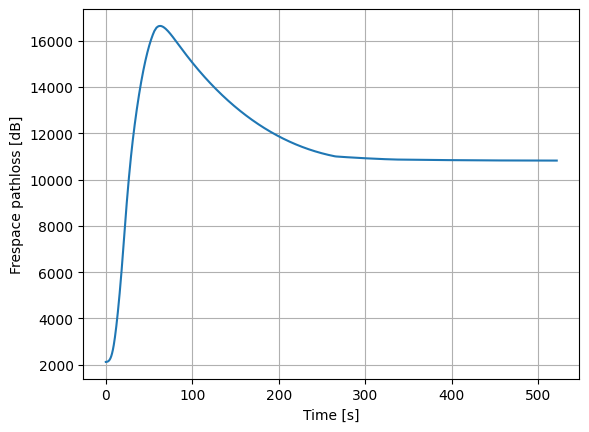

In [42]:
plt.grid()
plt.plot(df['time'][1:], df['antenna/pathloss/distance'][1:], label='FSPL')
plt.ylabel("Frespace pathloss [dB]")
plt.xlabel("Time [s]")

print(np.max(df['antenna/pathloss/distance'][1:]))